# 💻 Assignment: Data in AI (COMP3057)

This assignment is based on **Lecture 2: Introduction to Data**.

### 🎯 Goals
- Learn how different types of data (1D, 2D, 3D) are stored in computers.
- Practice working with **images** in Python/PyTorch.
- Understand **pixels, channels, size, and resolution** through coding.


**Note**: To encourage *free exploration*, this assignment will use some functions that were not explicitly covered in lecture. Do not panic—try to read the documentation or experiment with the functions yourself.

> **Note (Free Exploration Encouraged):** This assignment intentionally uses a few functions that do not appear in the lecture slides. Please don't worry—look up the docs, try small experiments, and learn by doing.


## 📏 Grading Overview (Total 100 pts)
- **Task 1 (1D Data): 20 pts**
- **Task 2 (Grayscale Image): 25 pts**
- **Task 3 (RGB Channels): 30 pts**
- **Task 4 (Size vs Resolution): 25 pts**

Submit a single `.ipynb` with outputs visible. Keep explanations concise (1–2 sentences each).

## 🔹 Task 1: 1D Data Exploration
1. Generate a **1D dataset** of daily temperatures for 30 days using Python (random numbers between 20°C–35°C).
2. Plot the dataset as a line chart.
3. Print its **shape** and explain why it is 1D.

👉 *Hint:* Use `numpy` or `torch` + `matplotlib`.

### 💯 Scoring
**Total: 20 pts**
- Generate 30 values in range [20,35]: **6 pts**
- Print correct shape (30,) and explain 1D correctly: **6 pts**
- Line plot rendered with axis labels/title: **6 pts**
- Code readability (comments, variable names): **2 pts**

### 💡 Hints
- **Goal**: Create a 1D array (30 days of temperatures), plot it, and explain why it's 1D.
- **Step-by-step**:
  1. Import libraries: `import numpy as np`, `import matplotlib.pyplot as plt`.
  2. Generate data: `temps = np.random.uniform(20, 35, size=30)`.
  3. Check shape: `print(temps.shape)` → should be `(30,)` (one axis only).
  4. Plot: `plt.plot(temps, marker='o'); plt.xlabel('Day'); plt.ylabel('Temperature (°C)'); plt.title('Daily Temperatures (30 days)'); plt.show()`.
- **What to write (2–3 sentences)**: Explain that **1D** means a single value per time step (one axis only). For example: each day has **one** temperature number.
- **Common pitfalls**: Forgetting `plt.show()`, using a 2D shape like `(30,1)` instead of `(30,)`, or missing axis labels.


temps.shape: (30,)
Why 1D? Because temps has a single axis with 30 elements—one temperature per day.


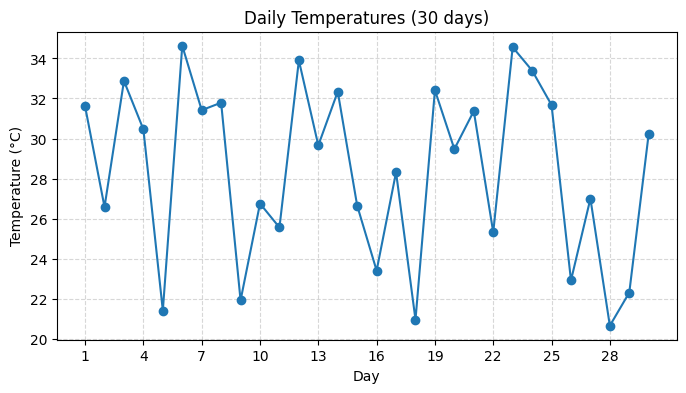

In [1]:



import numpy as np
import matplotlib.pyplot as plt

# Reproducibility (fixed seed)
rng = np.random.default_rng(seed=42)

# 1) Generate a 1D array of 30 daily temperatures in [20, 35)
temps = rng.uniform(20, 35, size=30)   # shape (30,)

# 2) Print the shape and a brief explanation
print("temps.shape:", temps.shape)  # Expect (30,)
print("Why 1D? Because temps has a single axis with 30 elements—one temperature per day.")

# 3) Plot as a line chart
days = np.arange(1, 31)  # Day indices 1..30
plt.figure(figsize=(8, 4))
plt.plot(days, temps, marker='o')
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperatures (30 days)")
plt.xticks(np.arange(1, 31, 3))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## 🔹 Task 2: From 1D to 2D — Images
1. Load a **grayscale image** (you can use `torchvision.datasets.MNIST` or `matplotlib.image.imread`).
2. Print the **pixel matrix** of the image.
3. Show the image using `matplotlib.pyplot.imshow`.
4. Verify its **shape**: `[Height, Width]`.

👉 Question: Why is this called **2D data**?

### 💯 Scoring
**Total: 25 pts**
- Load a grayscale image successfully: **6 pts**
- Show the numeric pixel matrix (partial print OK): **6 pts**
- Visualize with `imshow` in grayscale: **6 pts**
- Report correct shape `[H, W]` and briefly justify why it's 2D: **5 pts**

### 💡 Hints
- **Goal**: Load a grayscale image, confirm it is a 2D matrix (Height × Width), and display it.
- **Check dimensions**: `print(img.shape)` → `(H, W)` only.
- **Display**: `plt.imshow(img, cmap='gray'); plt.title('Grayscale Image'); plt.axis('off'); plt.show()`.
- **Show part of the matrix**: `print(img[:5, :10])` (first 5 rows × 10 columns is enough).
- **What to write (2–3 sentences)**: A grayscale image is 2D because it has **two spatial axes** (height and width), and each pixel is **one** number (brightness 0–255).
- **Common pitfalls**: Forgetting `cmap='gray'`, printing the entire matrix (too large), or confusing image shape order.


Loaded image path: /content/gray_sample.png
img.shape: (64, 64)
img.dtype: float32
Pixel sample (first 5 rows x 10 cols):
 [[0.         0.01568628 0.03137255 0.04705882 0.0627451  0.07843138
  0.09411765 0.10980392 0.1254902  0.14117648]
 [0.         0.01568628 0.03137255 0.04705882 0.0627451  0.07843138
  0.09411765 0.10980392 0.1254902  0.14117648]
 [0.         0.01568628 0.03137255 0.04705882 0.0627451  0.07843138
  0.09411765 0.10980392 0.1254902  0.14117648]
 [0.         0.01568628 0.03137255 0.04705882 0.0627451  0.07843138
  0.09411765 0.10980392 0.1254902  0.14117648]
 [0.         0.01568628 0.03137255 0.04705882 0.0627451  0.07843138
  0.09411765 0.10980392 0.1254902  0.14117648]]


/tmp/ipython-input-1030028764.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(gradient, mode="L").save(img_path)


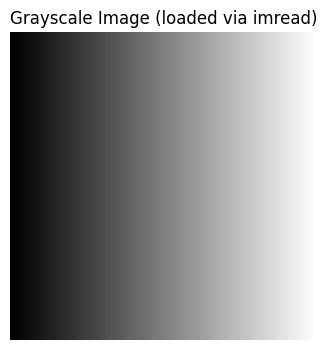

Why 2D? The image has two spatial axes (height and width). Each pixel is a single intensity value.


In [3]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 1) Create and SAVE a grayscale test image (64x64 gradient) to disk
H, W = 64, 64
gradient = np.tile(np.linspace(0, 255, W, dtype=np.uint8), (H, 1))  # shape (64, 64)
img_path = "/content/gray_sample.png" # Changed the path to /content
Image.fromarray(gradient, mode="L").save(img_path)

# 2) LOAD the image as an array using matplotlib.image.imread
img = mpimg.imread(img_path)   # Expect shape (H, W) for grayscale PNG

# 3) Show numeric pixel matrix (partial) + metadata
print("Loaded image path:", img_path)
print("img.shape:", img.shape)           # should be (H, W)
print("img.dtype:", img.dtype)
print("Pixel sample (first 5 rows x 10 cols):\n", img[:5, :10])

# 4) Visualize in grayscale
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Grayscale Image (loaded via imread)")
plt.axis("off")
plt.show()

# 5) Brief justification — printed to stdout for the rubric
print("Why 2D? The image has two spatial axes (height and width). Each pixel is a single intensity value.")

## 🔹 Task 3: RGB Channels
1. Load a **color image** (any `.png` or `.jpg`).
2. Print its shape → should be `[Height, Width, 3]`.
3. Split the image into **R, G, B channels** and display each one separately.
4. Pick one pixel (e.g., `[100, 150]`) and print its `(R, G, B)` values.

👉 Question: What does `(255, 0, 0)` mean?

### 💯 Scoring
**Total: 30 pts**
- Load a color image and print shape `[H, W, 3]`: **8 pts**
- Correctly split and visualize **R**, **G**, **B** channels: **12 pts** (4 pts each)
- Read and print one pixel’s `(R, G, B)` values: **5 pts**
- Short explanation of what `(255, 0, 0)` represents: **5 pts**

### 💡 Hints
- **Goal**: Load an RGB image, inspect shape `(H, W, 3)`, split R/G/B channels, and visualize each.

In [8]:
# Revised Task 3 (robust): Upload *your* image without saving to /mnt/data
# Fix for your error:
# - The previous code attempted to save a copy to /mnt/data, which may not exist in your environment.
# - This version processes the uploaded image *in memory* (no saving), so no FileNotFoundError.
#
# How to use:
# A) If ipywidgets is available, an upload button appears. Select a .png/.jpg and it will process.
# B) If ipywidgets is NOT available, set `image_path` at the bottom to your file path and re-run.
#
# What it does:
# 1) Loads your image as RGB (forces 3 channels).
# 2) Prints shape [H, W, 3].
# 3) Displays original and each channel (R/G/B) separately.
# 4) Prints pixel value at [100, 150] (clamped if needed).
# 5) Explains what (255, 0, 0) means.
import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def process_pil_image(im: Image.Image, filename: str = "(in-memory)"):
    """Process a PIL image: show shape, channels, visuals, and a sample pixel."""
    im = im.convert("RGB")                   # ensure 3 channels
    arr_uint8 = np.asarray(im, dtype=np.uint8)    # (H, W, 3), 0..255
    H, W, C = arr_uint8.shape
    assert C == 3, "Expected 3 channels after RGB conversion."

    # Print basic info
    print(f"Loaded: {filename}")
    print("Shape [H, W, 3]:", arr_uint8.shape)
    print("Dtype/range:", arr_uint8.dtype, "[0..255]")

    # Convert to float 0..1 for plotting clarity (Matplotlib supports uint8 too)
    arr = arr_uint8.astype(np.float32) / 255.0

    # Split channels
    Rch, Gch, Bch = arr[..., 0], arr[..., 1], arr[..., 2]

    # Display original
    plt.figure(figsize=(6, 4))
    plt.imshow(arr)
    plt.title("Original RGB Image")
    plt.axis("off")
    plt.show()

    # Display each channel as grayscale 2D
    for ch, name in [(Rch, "Red channel"), (Gch, "Green channel"), (Bch, "Blue channel")]:
        plt.figure(figsize=(4, 3))
        plt.imshow(ch, cmap="gray")
        plt.title(name)
        plt.axis("off")
        plt.show()

    # Sample pixel at [100, 150], clamped to image bounds
    r = min(100, H - 1)
    c = min(150, W - 1)
    rgb = tuple(arr_uint8[r, c, :].tolist())       # 0..255 ints
    print(f"Pixel at [row={r}, col={c}] (uint8 0..255): {rgb}")
    print("Meaning of (255, 0, 0): pure red in 8-bit RGB—red at maximum, green=0, blue=0.")

# Try ipywidgets for a direct upload workflow
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    uploader = widgets.FileUpload(accept='.png,.jpg,.jpeg', multiple=False)
    info = widgets.HTML("<b>Upload a .png or .jpg:</b> Processing runs automatically.")
    out = widgets.Output()

    def on_change(change):
        out.clear_output(wait=True)
        with out:
            if uploader.value:
                (fname, meta) = next(iter(uploader.value.items()))
                file_bytes = meta['content']
                try:
                    process_pil_image(Image.open(io.BytesIO(file_bytes)), fname)
                except Exception as e:
                    print("Error reading your file:", e)
            else:
                print("No file selected.")

    uploader.observe(on_change, names='value')
    display(info, uploader, out)
except Exception:
    # Fallback: set a path to your image file and run
    print("ipywidgets not available. Set image_path to your local file and re-run this cell.")
    image_path = ""  # e.g., "/content/myphoto.jpg" or "/mnt/data/myphoto.png"
    if image_path:
        with open(image_path, "rb") as f:
            process_pil_image(Image.open(io.BytesIO(f.read())), image_path)


HTML(value='<b>Upload a .png or .jpg:</b> Processing runs automatically.')

FileUpload(value={}, accept='.png,.jpg,.jpeg', description='Upload')

Output()

## 🔹 Task 4: Image Size vs Resolution
1. Resize the same image into:
   - 32×32  
   - 128×128  
   - 512×512  
2. Display all three images side by side.  
3. Compare: which one looks sharper? Why?  

👉 *Hint:* Use `torchvision.transforms.Resize` or `cv2.resize`.

### 💯 Scoring
**Total: 25 pts**
- Produce the three resized images (32×32, 128×128, 512×512): **12 pts** (4 pts each)
- Display side-by-side clearly with titles: **6 pts**
- Brief comparison explaining sharpness vs. pixel density/resolution: **7 pts**

### 💡 Hints
- **Goal**: Demonstrate how resizing changes pixel count and visual sharpness.
- **Display side-by-side** (matplotlib): create three subplots with proper titles.
- **Compare**: Higher pixel count (for the same display size) = higher effective resolution = sharper details.
- **What to write (2–4 sentences)**: Describe which looks sharper and why (relate to pixel density / resolution). Mention that upscaling a tiny image cannot invent true details; it only interpolates.


In [13]:
# Libraries for resizing
import torchvision.transforms as transforms
from PIL import Image

# Assuming 'img' is the original color image loaded in the previous task
# Convert the numpy array image (float32, 0-1 range) back to a PIL Image (uint8) for resizing
img_pil = Image.fromarray((img * 255).astype(np.uint8))

# Define the desired sizes
sizes = [32, 128, 512]
resized_images = {}

# Resize the image to different sizes
for size in sizes:
    resize_transform = transforms.Resize((size, size))
    resized_img_pil = resize_transform(img_pil)
    resized_images[size] = np.array(resized_img_pil) # Convert back to numpy array

# Display all three images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, size in enumerate(sizes):
    axes[i].imshow(resized_images[size])
    axes[i].set_title(f'{size}x{size} Pixels')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Comparison and explanation (stdout)
print("Comparison of image sharpness at different resolutions:")
print("The 512x512 image looks the sharpest, followed by the 128x128 image, and then the 32x32 image.")
print("This is because the higher resolution image (512x512) contains significantly more pixels for the same display area.")
print("More pixels mean more detail can be represented, leading to a sharper appearance.")
print("Upscaling a lower resolution image (like the 32x32 to a larger display size) interpolates the pixel values, but it cannot recover or invent true fine details that were not present in the original low-resolution data.")

Saving Screenshot 2023-02-03 163859.png to Screenshot 2023-02-03 163859.png
Loaded: /content/Screenshot 2023-02-03 163859.png | size [W,H]: (1552, 1015)


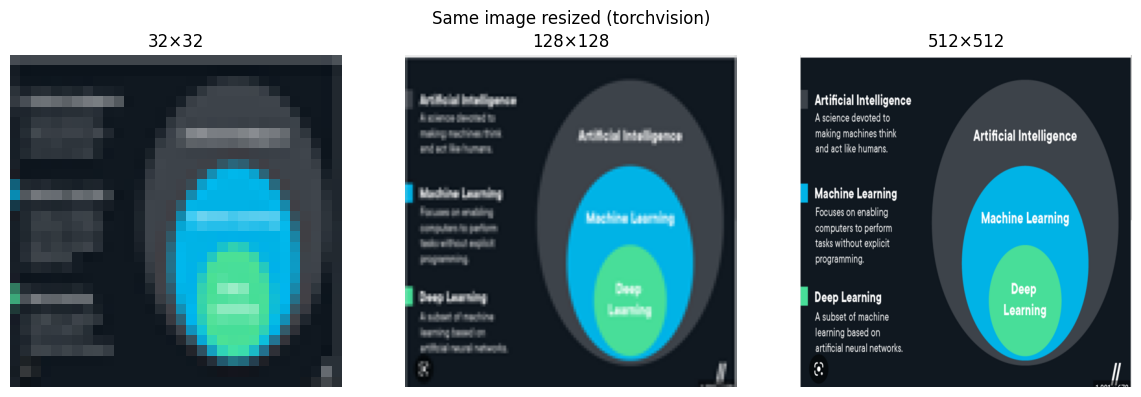

32×32 => 1,024 pixels
128×128 => 16,384 pixels
512×512 => 262,144 pixels
At the same display size, the 512×512 version looks sharpest
 because it packs more pixels into the same on-screen area (higher pixel density / effective resolution).
 The 32×32 version looks blockier because there are far fewer pixels to represent detail. When you upscale a small image, the algorithm only interpolates between existing pixels—it can’t invent true new details.


In [16]:
# If torchvision isn't available in your runtime, uncomment the next line:
# !pip -q install torch torchvision --upgrade

import matplotlib.pyplot as plt
import torchvision.transforms as T

sizes = [32, 128, 512]  # square outputs
resized = [T.Resize((s, s), interpolation=T.InterpolationMode.BICUBIC)(img) for s in sizes]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, im, s in zip(axes, resized, sizes):
    ax.imshow(im)
    ax.set_title(f"{s}×{s}")
    ax.axis("off")
plt.suptitle("Same image resized (torchvision)")
plt.tight_layout()
plt.show()

# (Optional) quick pixel-count printout
for s in sizes:
    print(f"{s}×{s} => {s*s:,} pixels")

print("At the same display size, the 512×512 version looks sharpest")
print(" because it packs more pixels into the same on-screen area (higher pixel density / effective resolution).")
print(" The 32×32 version looks blockier because there are far fewer pixels to represent detail. When you upscale a small image, the algorithm only interpolates between existing pixels—it can’t invent true new details.")
